In [1]:
"""imports"""
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import KFold, train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.style.use('ggplot')

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
df=pd.read_csv("../../documents/mlFiles/amazonToySales.csv")
display_side_by_side(df.head(5))

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [4]:
"""3 ways to count unique items"""
m1=len(df['manufacturer'].unique())
m2=df['manufacturer'].nunique()
m3=df['manufacturer'].value_counts() #shows each item and its number of occurrences in the dataset

In [5]:
mnCount=pd.DataFrame(df['manufacturer'].value_counts()) #manufacturer and count
print('shape:',mnCount.shape,'median: ')
display(mnCount.head(3))
mnCount.rename(columns={'manufacturer':'count'},inplace=True)#rename maufacturer column

shape: (2651, 1) median: 


,manufacturer
LEGO,171
Disney,167
Oxford Diecast,156


In [6]:
mnCount.index = mnCount.index.set_names(['manufacturer']) 
mnCount.reset_index(inplace=True)
mnCount.head(3)

,manufacturer,count
0,LEGO,171
1,Disney,167
2,Oxford Diecast,156


In [7]:
mnCount['count'].describe()

count    2651.000000
mean        3.769521
std        10.304792
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       171.000000
Name: count, dtype: float64

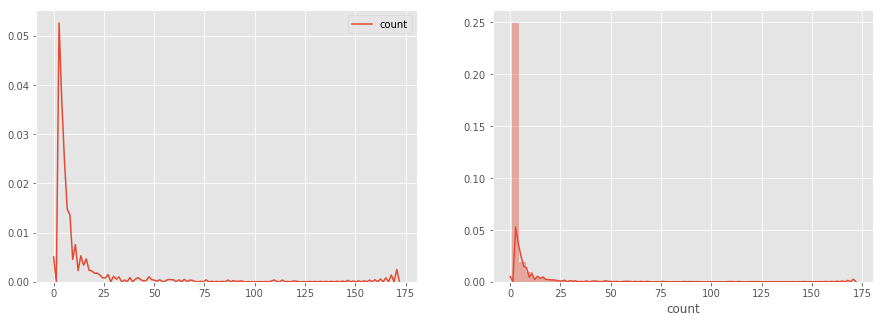

In [8]:
#view distibution of manufacturing count
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.kdeplot(mnCount['count'],ax=ax[0])
sns.distplot(mnCount['count'],ax=ax[1]) #seems like most companies sell between 0 to 12.5 toys

In [9]:
#price distribution
df['price']=df['price'].apply(lambda x: str(x).strip('£'))#remove all £
"""
df['price']=df['price'].apply(lambda x: float(str(x).lstrip('£'))) 
gives the error: could not convert string to float: '269.00 - £699.99'
It seems like some rows contain characters other than £, let's try to find them
"""

"\ndf['price']=df['price'].apply(lambda x: float(str(x).lstrip('£'))) \ngives the error: could not convert string to float: '269.00 - £699.99'\nIt seems like some rows contain characters other than £, let's try to find them\n"

In [10]:
import re
def findSpecialChars(price):
    invalidCount=0
    if not(re.search(r'^\d+(,\d{3})*(\.\d{1,2})?$', price)):
        invalidCount+=1
        print(price)

In [11]:
#see distribution of 'nans' per brand
priceGroup=df[df['price']=='nan'].groupby('manufacturer')
nanCount=len(priceGroup)
print(nanCount) #650: it turns out that only 650/2651 brands have nan in their price column


650


In [12]:
nanCountDf=df[df['price']=='nan'].groupby('manufacturer').count()
nanCountDf.head(2)
# sns.barplot(x='manufacturer',y='price',data=nanCountDf) #index has to be reset

,uniq_id,product_name,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
manufacturer,,,,,,,,,,,,,,,,
13,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0
4M,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [13]:
nanCountDf=nanCountDf.reset_index()

In [18]:
nanCountDf=nanCountDf.sort_values(by='price',ascending=False)
display_side_by_side(nanCountDf.iloc[:10,],
                    nanCountDf.iloc[11:21,])


,manufacturer,uniq_id,product_name,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
323,Mattel,37,37,37,35,37,32,37,36,30,31,37,31,25,4,37,24
226,Hasbro,35,35,35,34,35,32,35,35,32,34,35,34,27,5,35,16
281,LEGO,33,33,33,33,33,32,33,8,33,31,33,31,31,3,33,24
135,Disney,31,31,31,30,31,30,31,31,27,29,31,29,23,1,31,26
405,Pokémon,28,28,28,28,28,27,28,27,24,24,28,24,17,4,28,25
484,Star Wars,27,27,27,27,27,24,27,27,26,27,26,27,18,0,27,18
397,Playmobil,27,27,27,27,27,27,27,22,27,26,27,26,26,2,27,27
449,Scalextric,20,20,20,18,20,20,20,20,20,20,20,20,15,0,20,0
231,Hornby,19,19,19,17,19,19,19,19,19,19,19,19,14,2,19,9
113,Corgi,18,18,18,18,18,16,18,18,13,17,18,17,10,1,18,12


In [22]:
df2=df[df['price']!='nan'] #dataframe copy of df, where all nan price columns are dropped

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,NaN,NaN,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,Hornby 2014 Catalogue,NaN,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,FunkyBuys® Large Christmas Holiday Express Fes...,Hornby,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
